In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline
sns.set_style("darkgrid")
plt.rcParams['figure.figsize'] = (14, 8)

In [2]:
matches = pd.read_csv('matches.csv')

In [3]:
matches.shape

(756, 18)

In [4]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12  win_by_wickets   756 non-null    int64 
 13  player_of_match  752 non-null    object
 14  venue            756 non-null    object
 15  umpire1          754 non-null    object
 16  umpire2          754 non-null    object
 17  umpire3          119 non-null    ob

In [5]:
matches.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,756.000000,756.000000,756.000000,756.000000,756.000000
mean,1792.178571,2013.444444,0.025132,13.283069,3.350529
std,3464.478148,3.366895,0.156630,23.471144,3.387963
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,189.750000,2011.000000,0.000000,0.000000,0.000000
50%,378.500000,2013.000000,0.000000,0.000000,4.000000
75%,567.250000,2016.000000,0.000000,19.000000,6.000000
max,11415.000000,2019.000000,1.000000,146.000000,10.000000


In [6]:
matches['id'].max()

11415

In [7]:
matches['season'].unique()

array([2017, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2018,
       2019])

In [8]:
len(matches['season'].unique())

12

In [9]:
matches.iloc[matches['win_by_runs'].idxmax()]

id                               44
season                         2017
city                          Delhi
date                     2017-05-06
team1                Mumbai Indians
team2              Delhi Daredevils
toss_winner        Delhi Daredevils
toss_decision                 field
result                       normal
dl_applied                        0
winner               Mumbai Indians
win_by_runs                     146
win_by_wickets                    0
player_of_match         LMP Simmons
venue              Feroz Shah Kotla
umpire1                 Nitin Menon
umpire2                   CK Nandan
umpire3                         NaN
Name: 43, dtype: object

In [10]:
matches.iloc[matches['win_by_wickets'].idxmax()]

id                                                      3
season                                               2017
city                                               Rajkot
date                                           2017-04-07
team1                                       Gujarat Lions
team2                               Kolkata Knight Riders
toss_winner                         Kolkata Knight Riders
toss_decision                                       field
result                                             normal
dl_applied                                              0
winner                              Kolkata Knight Riders
win_by_runs                                             0
win_by_wickets                                         10
player_of_match                                   CA Lynn
venue              Saurashtra Cricket Association Stadium
umpire1                                       Nitin Menon
umpire2                                         CK Nandan
umpire3       

In [11]:
matches.iloc[matches[matches['win_by_runs'].ge(1)].win_by_runs.idxmin()]

id                                                        59
season                                                  2017
city                                               Hyderabad
date                                              2017-05-21
team1                                         Mumbai Indians
team2                                 Rising Pune Supergiant
toss_winner                                   Mumbai Indians
toss_decision                                            bat
result                                                normal
dl_applied                                                 0
winner                                        Mumbai Indians
win_by_runs                                                1
win_by_wickets                                             0
player_of_match                                    KH Pandya
venue              Rajiv Gandhi International Stadium, Uppal
umpire1                                             NJ Llong
umpire2                 

In [12]:
matches[matches[matches['win_by_runs'].ge(1)].win_by_runs.min() == matches['win_by_runs']]['winner']

58                  Mumbai Indians
105                Kings XI Punjab
163                Kings XI Punjab
344               Delhi Daredevils
350                 Mumbai Indians
518            Chennai Super Kings
598                  Gujarat Lions
614    Royal Challengers Bangalore
734    Royal Challengers Bangalore
755                 Mumbai Indians
Name: winner, dtype: object

In [13]:
matches.iloc[matches[matches['win_by_wickets'].ge(1)].win_by_wickets.idxmin()]

id                                   560
season                              2015
city                             Kolkata
date                          2015-05-09
team1                    Kings XI Punjab
team2              Kolkata Knight Riders
toss_winner              Kings XI Punjab
toss_decision                        bat
result                            normal
dl_applied                             0
winner             Kolkata Knight Riders
win_by_runs                            0
win_by_wickets                         1
player_of_match               AD Russell
venue                       Eden Gardens
umpire1                     AK Chaudhary
umpire2                  HDPK Dharmasena
umpire3                              NaN
Name: 559, dtype: object

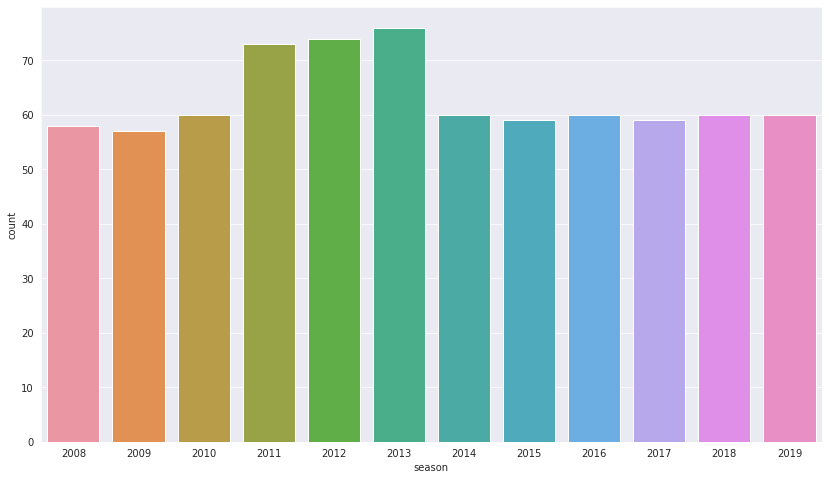

In [14]:
sns.countplot(x='season', data=matches)
plt.show()

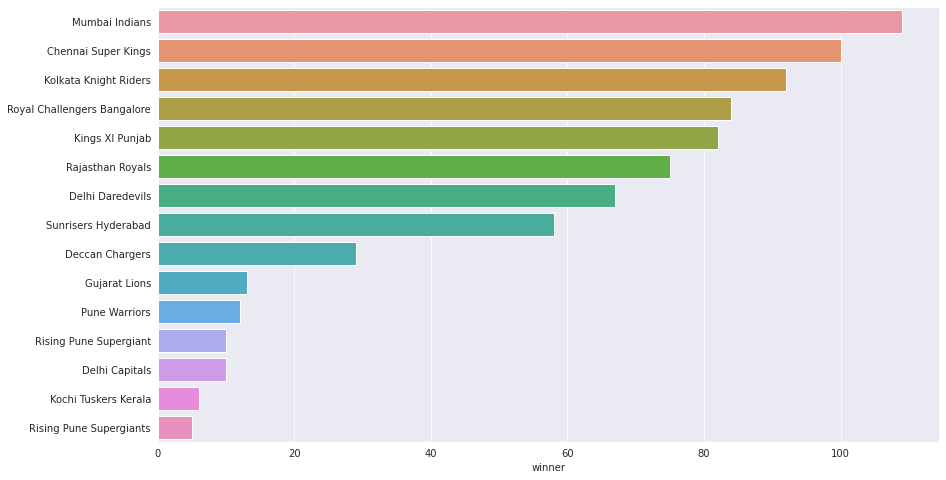

In [15]:
data = matches.winner.value_counts()
sns.barplot(y = data.index, x = data, orient='h');

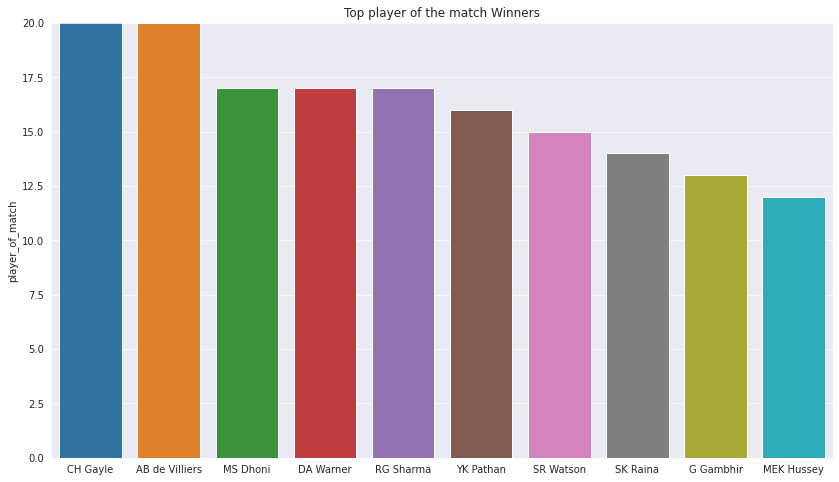

In [16]:
top_players = matches.player_of_match.value_counts()[:10]
#sns.barplot(x="day", y="total_bill", data=tips)
fig, ax = plt.subplots()
ax.set_ylim([0,20])
ax.set_ylabel("Count")
ax.set_title("Top player of the match Winners")
#top_players.plot.bar()
sns.barplot(x = top_players.index, y = top_players, orient='v'); #palette="Blues");
plt.show()

In [17]:
ss = matches['toss_winner'] == matches['winner']

ss.groupby(ss).size()

False    363
True     393
dtype: int64

In [18]:
round(ss.groupby(ss).size() / ss.count() * 100,2)

False    48.02
True     51.98
dtype: float64

/home/kujurbimal/.local/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


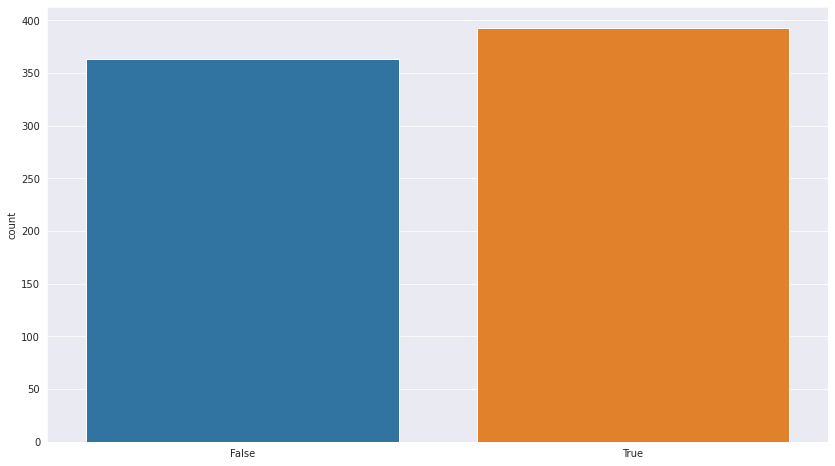

In [19]:
sns.countplot(ss);

In [20]:
matches[matches['win_by_runs']>0].groupby(['winner'])['win_by_runs'].apply(np.median).sort_values(ascending = False)

winner
Delhi Capitals                 37.0
Rising Pune Supergiants        26.5
Rajasthan Royals               26.0
Mumbai Indians                 25.0
Kolkata Knight Riders          24.5
Chennai Super Kings            24.0
Pune Warriors                  23.0
Rising Pune Supergiant         20.0
Royal Challengers Bangalore    20.0
Delhi Daredevils               17.0
Kings XI Punjab                17.0
Sunrisers Hyderabad            15.5
Deccan Chargers                14.5
Kochi Tuskers Kerala           11.5
Gujarat Lions                   1.0
Name: win_by_runs, dtype: float64

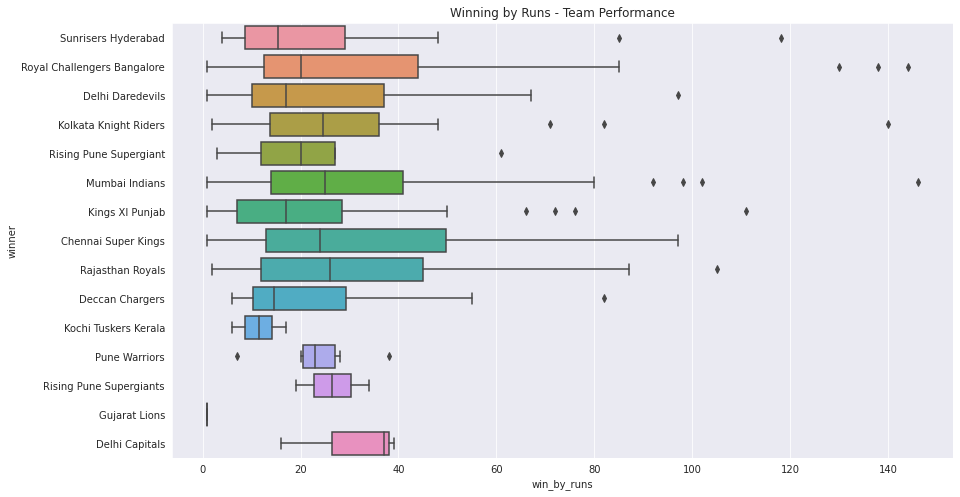

In [21]:
#sns.barplot(x="day", y="total_bill", data=tips)
fig, ax = plt.subplots()
#fig.figsize = [16,10]
#ax.set_ylim([0,20])
ax.set_title("Winning by Runs - Team Performance")
#top_players.plot.bar()
sns.boxplot(y = 'winner', x = 'win_by_runs', data=matches[matches['win_by_runs']>0], orient = 'h'); #palette="Blues");
plt.show()

In [22]:
matches[matches['win_by_wickets']>0].groupby(['winner'])['win_by_wickets'].apply(np.median).sort_values(ascending = False)

winner
Kochi Tuskers Kerala           7.5
Rising Pune Supergiants        7.0
Sunrisers Hyderabad            7.0
Delhi Daredevils               6.5
Pune Warriors                  6.5
Royal Challengers Bangalore    6.5
Chennai Super Kings            6.0
Deccan Chargers                6.0
Gujarat Lions                  6.0
Kings XI Punjab                6.0
Kolkata Knight Riders          6.0
Mumbai Indians                 6.0
Rajasthan Royals               6.0
Rising Pune Supergiant         6.0
Delhi Capitals                 5.0
Name: win_by_wickets, dtype: float64

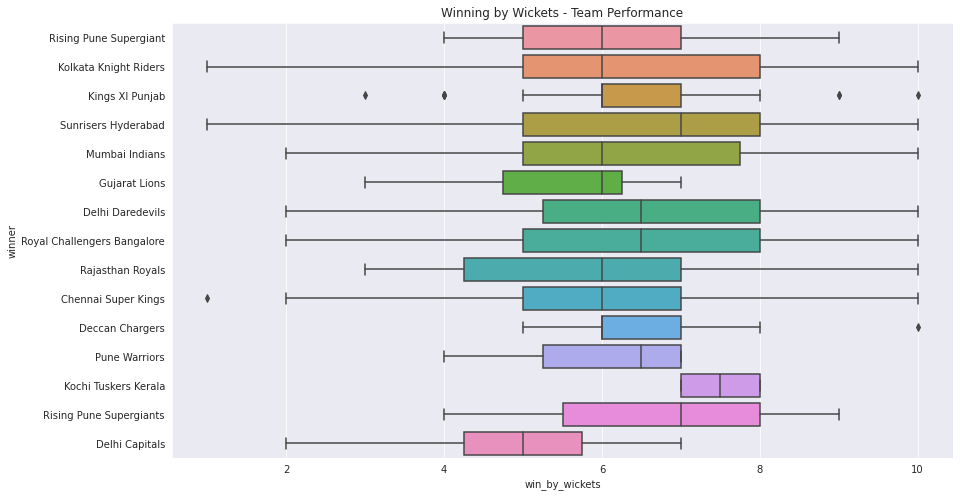

In [23]:
#sns.barplot(x="day", y="total_bill", data=tips)
fig, ax = plt.subplots()
#fig.figsize = [16,10]
#ax.set_ylim([0,20])
ax.set_title("Winning by Wickets - Team Performance")
#top_players.plot.bar()
sns.boxplot(y = 'winner', x = 'win_by_wickets', data=matches[matches['win_by_wickets']>0], orient = 'h'); #palette="Blues");
plt.show()